In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sn

In [3]:
filename = 'dataset_SCL.csv'
filepath = os.path.join('..', 'datasets', filename)

Leemos los datos

In [4]:
dataset = pd.read_csv(filepath)

/var/folders/7q/9zlb0wdx18g6v2ltqtd7j_100000gn/T/ipykernel_78746/2671589788.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(filepath)


In [5]:
dataset

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Obtenemos la temporalidad de los datos. En este caso se asume que el rango de temporada alta incluye las fechas en los extremos

In [6]:
def check_high_season(month, day):
    date = (month, day)
    d11 = (12, 15)
    d12 = (12, 31) # december is a special case
    d21 = (1, 0)
    d22 = (3, 3)
    d3 = (7,15)
    d4 = (7, 31)
    d5 = (9, 11)
    d6 = (9, 30)
    return (d11<=date<=d12) | (d21<=date<=d22) | (d3<=date<=d4) | (d5<=date<=d6)

Hacemos testeo de la funcion para asegurar que este funcionando, en especial los casos bordes (limites) y especiales (diciembre mes 12)

In [7]:
assert check_high_season(2,18) == 1 # in range hs
assert check_high_season(7,31) == 1 # in  upper limit hs
assert check_high_season(9,11) == 1 # in  lower limit hs
assert check_high_season(5,31) == 0 # not hs
assert check_high_season(12,24) == 1 # december hs
assert check_high_season(12,1) == 0 # december not hs

Aplicamos la funcion al dataset

In [8]:
dataset["Temp-A"] = dataset.apply(lambda row: check_high_season(row["MES"], row["DIA"]), axis=1)

In [9]:
dataset

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Temp-A
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,True
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,True
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,True
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,True
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,True
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,True
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,True
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,True


Obtenemos la diferencia en minutos entre la fecha programada y de operacion. **De ahora en adelante, asumimos que esta diferencia en minutos corresponde al atraso del vuelo**

In [10]:
from datetime import datetime

In [11]:
def get_flight_delay(programmed_time, operating_time):
    time_format = '%Y-%m-%d %H:%M:%S'
    diff =  datetime.strptime(operating_time, time_format) - datetime.strptime(programmed_time, time_format) 
    minutes = (diff.total_seconds() % 3600) // 60
    return minutes

In [12]:
assert get_flight_delay('2017-12-22 14:55:00','2017-12-22 15:41:00') == 46 # simple delay check

Aplicamos la funcion al dataset

In [13]:
dataset["ATRASO"] = dataset.apply(lambda row: get_flight_delay(row["Fecha-I"], row["Fecha-O"]), axis=1)

Ahora creamos la funcion de atraso menor (delay menor a 15 y mayor que 0)

In [14]:
dataset["Min-A"] = (dataset["ATRASO"] < 15) & (dataset["ATRASO"] > 0)

Creamos una funcion para obtener los periodos del dia: mañana, tarde, noche

In [15]:
def get_day_period(date):
    time_format = '%Y-%m-%d %H:%M:%S'
    date = datetime.strptime(date, time_format)
    time = (date.hour, date.minute)
    morn_start = (5, 00)
    aft_start = (12, 00)
    night1_start = (19, 00)
    night2_start = (00, 00)
    if  morn_start<=time<aft_start:
        return 'morning'
    elif aft_start<=time<night1_start:
        return 'afternoon'
    elif night1_start<=time<night2_start:
        return 'night'
    else:
        return 'night'


Probamos la funcion, en especial los casos bordes (limites y paso de noche de 23:59 a 00:01)

In [16]:
assert get_day_period('2017-12-22 05:00:00') == 'morning'
assert get_day_period('2017-12-22 11:55:00') == 'morning'
assert get_day_period('2019-10-02 11:59:00') == 'morning'
assert get_day_period('2019-10-02 12:00:00') == 'afternoon'
assert get_day_period('2017-12-22 14:55:00') == 'afternoon'
assert get_day_period('2019-10-02 18:59:00') == 'afternoon'
assert get_day_period('2019-10-02 19:00:00') == 'night'
assert get_day_period('2019-10-02 22:52:00') == 'night'
assert get_day_period('2019-10-02 00:00:00') == 'night'
assert get_day_period('2019-10-02 4:59:00') == 'night'


In [17]:
dataset["Per-D"] = dataset.apply(lambda row: get_day_period(row["Fecha-I"]), axis=1)

Ahora que obtuvimos las features sinteticas, podemos profundizar en la distribucion de los datos.

<Axes: xlabel='ATRASO', ylabel='Count'>

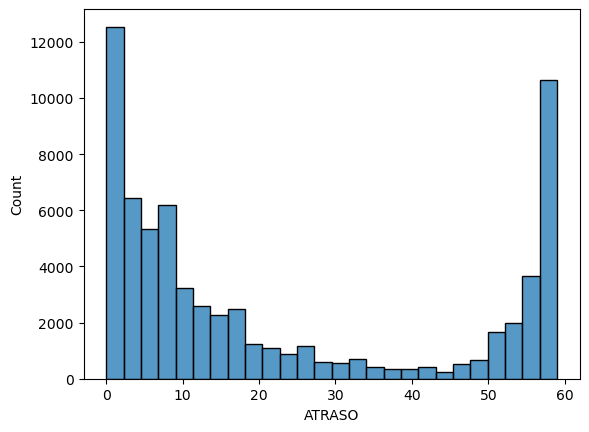

In [21]:
sn.histplot(data=dataset, x="ATRASO")

La distribucion de los datos como es de esperar es de estilo ***skewed***, pero a ambos extremos. Es decir, los datos segun el tiempo de atraso se concentran en los valores mas altos y bajos. Llama la atencion que existe un alto numero de vuelos que tienene atrasos sobre los 50 minutos. Quizas se deba a problemas mas graves como temporales, problemas del avion, etc. Para trabajar con esto, considerando que existe un alto porcentaje de los vuelos que concentran atrasos minimos, seria bueno considerar el atraso superior a un minimo

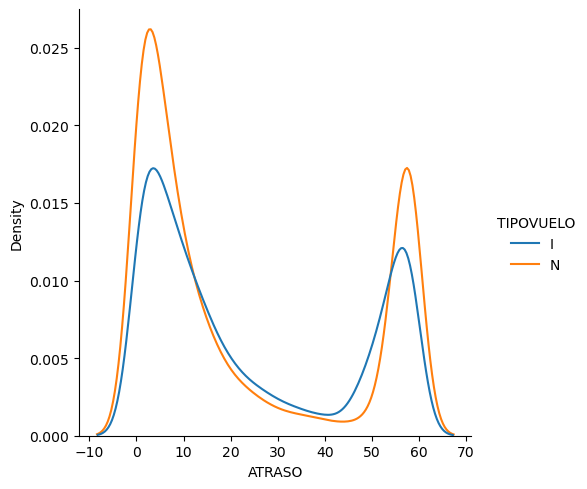

In [19]:
sn.displot(data=dataset, x="ATRASO", hue="TIPOVUELO", kind="kde")

Si vemos la distribucion de los datos segun el tipo de vuelo, vemos que los vuelos de tipo nacional concentran una mayor probabilidad de atraso por lo que seria un buen predictor.

<Axes: xlabel='ATRASO', ylabel='Count'>

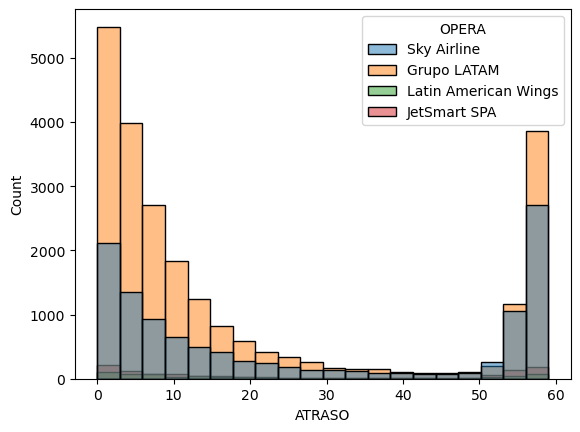

In [22]:
sn.histplot(data=dataset[dataset['TIPOVUELO']=='N'], x="ATRASO", hue="OPERA")

Siguiendo con lo anterior, vemos que LATAM y SKY concentran la mayor cantidad de atrasos.

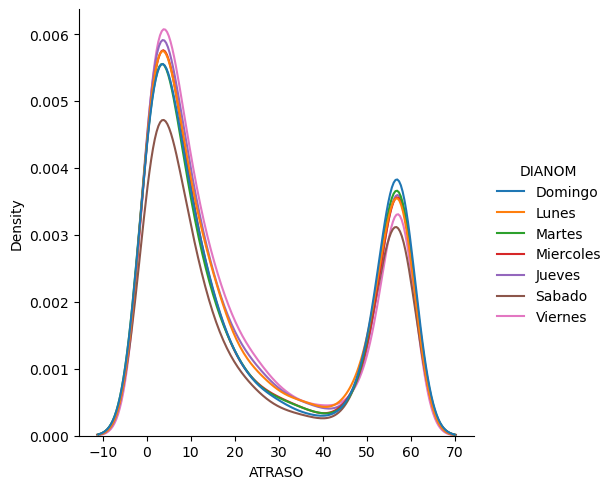

In [20]:
sn.displot(data=dataset, x="ATRASO", hue="DIANOM", kind="kde")

A la vez, si graficamos la distribucion de probabilidad de atraso segun el dia vemos que existe una diferencia muy clara entre ellos. Por ejemplo, que es muhco menos probable un atraso un sabado que un viernes. Esto se puede relacionar con el nivel de flujo de pasajeros en los aeropuertos esos mismos dias. 

<Axes: xlabel='count', ylabel='OPERA'>

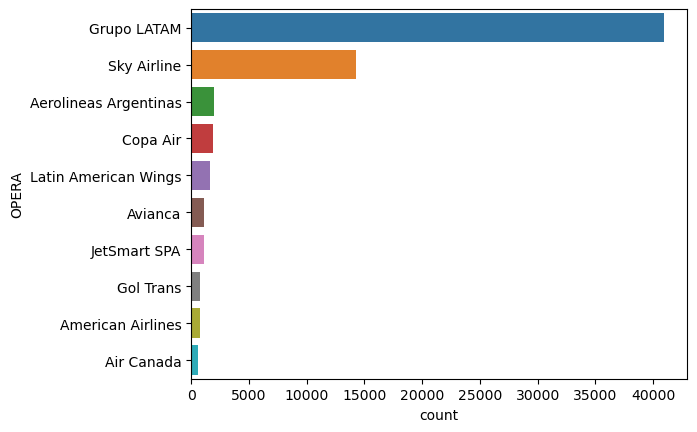

In [34]:
airlines_flights = dataset['OPERA'].value_counts() 
top_airlines = airlines_flights[airlines_flights>500]
sn.barplot(x=top_airlines, y=top_airlines.index, orient="h")

Si graficamos la presencia de datos por aerolinea, vemos que estan fuertemente dominados por, como es de esperar, entre LATAM y Sky. Es necesario considerar esta distribucion al particionar los datos entre train/test.

Como se explica en el readme del proyecto, en este caso se busca predecir la probablidad de atraso, es decir si ocurre un atraso o no. No se busca por ende predecir el atraso exacto en minutos. Se puede considerar como atraso si la diferencia entre el tiempo de operacion y programado es sobre 0 minutos o sobre un cierto rango. Se toma la decision de considerar un cierto rango, en especifico el que se obtuvo previamente (atraso menor equivalente a < 15 minutos). **Por lo tanto, es un atraso si se supera los 15 minutos de diferencia entre el tiempo programado y el de operacion.**


In [26]:
dataset["ATRASADO"] = (dataset["ATRASO"] >= 15) 

Guardamos las features generadas en un nuevo archivo

In [29]:
synthetic_features=["Temp-A", "ATRASO", "Min-A", "Per-D", "ATRASADO"]

In [31]:
dataset[synthetic_features].to_csv(os.path.join("..", "datasets", "synthetic_features.csv"))

## Anexo

### Pruebas de datos

In [27]:
dataset.isnull().sum().sum()

1

Solo un dato nulo. Se borra en el entrenamiento

In [28]:
len(dataset["Vlo-I"].unique())

750

750 vuelos distintos

In [25]:
dataset[dataset['Vlo-I']!=dataset['Vlo-O']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Temp-A,ATRASO,Min-A,Per-D
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,...,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,True,31.0,False,morning
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,...,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires,True,54.0,False,morning
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,...,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,True,0.0,False,morning
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,...,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires,True,1.0,True,morning
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,...,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,True,6.0,True,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65532,2017-12-16 13:41:00,265,SCEL,SCTE,LAN,2017-12-16 13:49:00,265.0,SCEL,SCTE,LXP,...,2017,Sabado,N,Grupo LATAM,Santiago,Puerto Montt,True,8.0,True,afternoon
65533,2017-12-18 15:59:00,265,SCEL,SCTE,LAN,2017-12-18 16:07:00,265.0,SCEL,SCTE,LXP,...,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt,True,8.0,True,afternoon
65534,2017-12-19 15:11:00,265,SCEL,SCTE,LAN,2017-12-19 15:10:00,265.0,SCEL,SCTE,LXP,...,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt,True,59.0,False,afternoon
65535,2017-12-25 16:19:00,265,SCEL,SCTE,LAN,2017-12-25 16:24:00,265.0,SCEL,SCTE,LXP,...,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt,True,5.0,True,afternoon


In [26]:
dataset[dataset['Ori-I']!=dataset['Ori-O']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Temp-A,ATRASO,Min-A,Per-D


El codigo de ciudad de origen programado y de operacion siempre es el mismo

In [34]:
dataset[dataset['Des-I']!=dataset['Des-O']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Temp-A,ATRASO,Min-A,Per-D,ATRASADO
1397,2017-01-17 19:20:00,25,SCEL,SCTE,SKU,2017-01-17 19:46:00,25,SCEL,SCQP,SKU,...,Martes,N,Sky Airline,Santiago,Temuco,True,26.0,False,night,True
7290,2017-02-15 06:25:00,11,SCEL,SCTE,SKU,2017-02-15 06:25:00,11,SCEL,SCQP,SKU,...,Miercoles,N,Sky Airline,Santiago,Temuco,True,0.0,False,morning,False
7520,2017-02-27 06:40:00,71,SCEL,SCIE,SKU,2017-02-27 09:07:00,71,SCEL,SCQP,SKU,...,Lunes,N,Sky Airline,Santiago,Temuco,True,27.0,False,morning,True
8456,2017-02-15 06:10:00,57,SCEL,SCTE,LAN,2017-02-15 06:12:00,57,SCEL,SCQP,LAN,...,Miercoles,N,Grupo LATAM,Santiago,Temuco,True,2.0,True,morning,False
12787,2017-03-18 06:25:00,11,SCEL,SCTE,SKU,2017-03-18 06:29:00,11,SCEL,SCQP,SKU,...,Sabado,N,Sky Airline,Santiago,Temuco,False,4.0,True,morning,False
12823,2017-03-22 12:50:00,17,SCEL,SCBA,SKU,2017-03-22 12:48:00,17,SCEL,SCTE,SKU,...,Miercoles,N,Sky Airline,Santiago,Puerto Montt,False,58.0,False,afternoon,True
16169,2017-03-13 23:20:00,532,SCEL,KJFK,LAN,2017-03-14 01:35:00,1346,SCEL,KMIA,LAN,...,Martes,I,Grupo LATAM,Santiago,Miami,False,15.0,False,night,True
16937,2017-03-22 17:00:00,1446,SCEL,SEGU,LAN,2017-03-22 17:11:00,1361,SCEL,SABE,LAN,...,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires,False,11.0,True,afternoon,False
18293,2017-04-14 18:40:00,25,SCEL,SCTE,SKU,2017-04-14 18:48:00,25,SCEL,SCQP,SKU,...,Viernes,N,Sky Airline,Santiago,Temuco,False,8.0,True,afternoon,False
20444,2017-04-14 22:00:00,289,SCEL,SCTE,LAN,2017-04-14 22:01:00,289,SCEL,SCCI,LXP,...,Viernes,N,Grupo LATAM,Santiago,Punta Arenas,False,1.0,True,night,False


El destino programado a veces cambia, pero poco (outliers)

In [35]:
dataset['AÑO'].value_counts()

AÑO
2017    68204
2018        2
Name: count, dtype: int64

Casi todos los datos son del mismo año (excepto 2)